Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

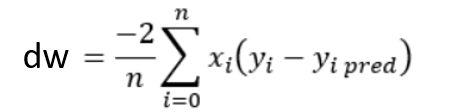

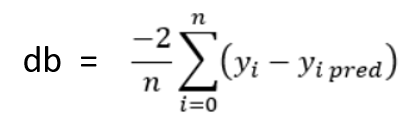

In [ ]:
#importing numpy library
import numpy as np

**Linear Regression**

In [ ]:
class linear_regression:
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self, x, y):

    #number of training examples and no. of features
    self.m,self.n=x.shape #no. of rows and columns
    #initating the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    #implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    y_prediction=self.predict(self.x)

    #calculate gradients
    dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
    db=-2*np.sum(self.y-y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self,x):
    return x.dot(self.w)+self.b

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model=linear_regression()

Using linear regression model for prediction

In [ ]:
#importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing

In [ ]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
#no. of rows and coloumns in dataframe
salary_data.shape

(30, 2)

In [ ]:
 #checking for missing values
 salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
#splitting the features and the target
x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,-1].values

In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
#splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [ ]:
#linear regression model
model=linear_regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
#printing parameters values
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9514.400999035135
bias= 23697.406507136307


y=9580(x)+23226

salary=9580(experience)+23226

In [ ]:
y_test_pred=model.predict(x_test)

In [ ]:
print(y_test_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


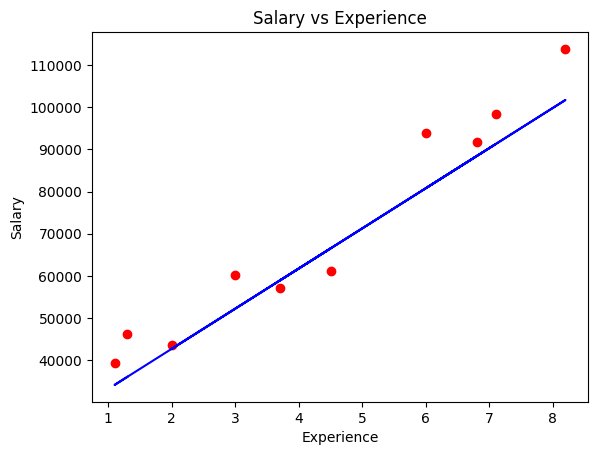

In [ ]:
#visualising the predictor values and the actual values
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_test_pred,color='blue')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()